In [1]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt ;t = Okt()

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('naver_webtoon_chat.csv')
df = df.iloc[3:,1:]
print(df.shape)

(32139, 343)


In [4]:
df.iloc[:2,:]

,인생존망,뷰티풀 군바리,윈드브레이커,소녀의 세계,백수세끼,파이게임,장씨세가 호위무사,앵무살수,야자괴담,유일무이 로맨스,...,오늘도 사랑하세요,죽여주는 탐정님,그녀의 버킷리스트,만찢남녀,Here U Are,위험한 신입사원,불발소년,선녀야 야옹해봐!,8월의 눈보라,마도
3,아니 저 작가는 떡밭을 다른 웹툰에서 풀엌ㅋㅋㅋㅋㅋㅋㅋㅋ,다행이다.. 수아가 선임복은 없어도 후임복은 조금이나마 있어서,아무리 자현이라도 월클은 월클이구나 .. 장비 제대로 있었으면 자현이가 그냥 발리는...,나리ㅠㅜㅜ무시당하는거 마음아파ㅜㅜㅜ진짜 팀과제에서 저렇게 공기취급받으면 억장 무너짐...,수정이 재호 다시 안만나면 네이버 본사앞에서 팬티만 입고 깡춘다,윗계급일수록 더 많은돈을 낸다.공평하냐고 생각하냐.이거 딱 세금얘기네요...ㄷㄷ,너무 재밌다,이야 그래도 저 아들은 끝까지 괜찮은 놈이었구먼초반에 주인공 질투하는것 같았는데,이러고 은아가 다시 세진이 구하러 야자시간에 존버탈듯,탁무이 스토커 때문에 고생한거 알면서 왜저럼 생각이없는거야 개념이 없는거야 둘다 없는거야,...,아씨 나만 부케 도둑맞았다는 소리 불안해...? 왠지 보름이로 몰아갈것 같아서 너무...,이번편은 우리나라 체육계의 어두운면을 다루는 내용이네. 그 중에서 내 메달도 그 수...,평범하게 헤어지라고 그니까.... 환승이별보다 거지같네 라리가 뭘 그렇게 잘못해서 ...,예준?해준? 선배 소식 듣고 케이크만 놓고 갔네ㅜㅜㅜㅜㅜ괜히 짠하고 내가 더 고맙다...,아이고 아이고 아이고 아이고 이 할미 죽는다 죽어어어ㅓㅇ,유림아 그 종이 씹어먹어 삼켜,아 ㅋㅋ 대머리한테 대머리라고 하는 건 선넘은 거 아니냐고 ㅋㅋㅋ 아 ㅋㅋㅋ,상대방의 동의 없는 키스는 남녀를 불문하고 성추행입니다.ㅡㅡ,둘이차인남자가 술먹고한 행동,돌아오면 쿠키로 다지를테니 꼭 돌아오세요..
4,베댓아 떡밭은 뭐하는 밭이냐..???,군생활 진짜 알차게 하네ㅋㅋㅋㅋ 지루하다고 할 수 있는 근무를 엄청 보람차게 하잖아...,클리퍼를 모르시는 분들께 말씀드리자면 클리퍼=바리깡이라고 보시면 됩니다,조유정 쟤가 제일 문제고 사촌이 거들어주고있고 나머지 애들도 분위기 휩쓸려가네ㅠㅠㅠ...,수정이랑 다시 만나는 전개가 아닐 시 저 웹툰앱 삭제하겠습니다...,이게 ㅈ나 불공평한게 7층은 음. 엥간치 벌었네 그만할거임 ㅋㅋ 하고 시간 안벌면 ...,참... 잘만든 웹툰이다. 원래 먼치킨물을 보면 어느순간 플릇에 힘이 빠지거나 기대...,황천행 바로 사요나라하네... 초반에 비중있게 나온 캐릭터 가차없이 잘라버리는거 보...,헐 그럼... 저 괴담 몸 속 큰 뱀 하나가 본체였고 은아가 일부러 본체 못 나오도...,저거 사진 때문에 무이집 알아낼까봐 그러는것 같은데 유일언니 너무 멋쟈ㅠㅠ,...,우찬아 니가 나올때마다 즐겁고 행복해....,저 말 너무 마음이 아프다 쟤가 울면 선수가 우는 거지만 니가 울면 여자선수가 우는 거야,지만 바라보는 애를 떠나면 니가 바뀌냐? 지나가던 고2도 어이없어서 웃는다ㅋㅋㅋㅋㅋ,쾅쾅곧완결이라고요?쾅쾅쾅쾅 쾅쾅쾅쾅 （∩8ㅁ8） 쾅쾅 ＿/_ﾐつ/￣￣￣/ ...,아니 아저씨 한 살이라도 젊을 때 만나주라...ㅜㅜ,그대로 읽자 그리고 개 쪽을 주자,"너 예의고 ""모""고 없구나?",....마지막 장면보고 소리 질러서 엄마한테 등짝 맞았다...,아니 진짜 둘다 잘생기면 어케 골라ㅜㅠㅠㅠㅠㅠ,성장 이야기 좋아해요. 의욕만 앞서다 사역마를 허무하게 잃었지만 인남이를 구출해줄 ...


In [21]:
df['유미의 세포들'] = df['유미의 세포들'].apply(lambda x: str(x))
string1 = 'split'.join(list(df['유미의 세포들'].values))

In [27]:
stop_special_char = re.sub(pattern='[가-힣 a-zA-Z\d\n]+',repl='',string = string1)
stop_special_char_pattern = '['+'\\'.join(set(stop_special_char))+']'

In [25]:
stop_special_char_pattern

'[σ\\◞\\爱\\🤫\\ㅈ\\બ\\🏽\\😲\\{\\🍊\\̋\\⣥\\偉\\ˇ\\🏿\\💚\\❕\\🎩\\│\\*\\●\\х\\Р\\⠻\\⚘\\⣄\\=\\🥶\\🙍\\🎆\\\u3000\\🎀\\и\\🙃\\▓\\▾\\😻\\🍓\\ー\\я\\✌\\௰\\万\\👃\\🏵\\🛠\\🌨\\ฅ\\\'\\愿\\સ\\🧒\\₍\\口\\起\\🦄\\✧\\年\\_\\̷\\┣\\≥\\⊃\\%\\у\\👨\\⡿\\̴\\η\\ｎ\\м\\ミ\\⬇\\ㅊ\\ヲ\\っ\\们\\↑\\⠛\\゜\\ﾟ\\ㅛ\\ℹ\\🇲\\😝\\💈\\⁉\\▋\\🙋\\🌧\\🥰\\⠰\\🔥\\╮\\ꈊ\\🧍\\Ｊ\\ノ\\ↀ\\🔴\\🙉\\💢\\😉\\筑\\🎤\\⁻\\ᕙ\\🥴\\✈\\᷄\\🚫\\ㅚ\\ቼ\\ヾ\\🤦\\С\\🧊\\每\\᷅\\❣\\⫬\\ᗜ\\🐕\\席\\ˀ\\⡛\\Д\\↓\\引\\⌯\\🌝\\!\\̤\\💬\\θ\\➖\\┳\\🏑\\꒳\\⢿\\🎸\\ㅃ\\̩\\💝\\Ｕ\\🌞\\乳\\͡\\と\\🍍\\ī\\ࠅ\\❌\\⊝\\💛\\們\\👊\\毛\\⚠\\💔\\😄\\⬛\\领\\ω\\💧\\‶\\😎\\❤\\つ\\⁾\\🤍\\】\\⁶\\„\\ෆ\\🥟\\▽\\💗\\✨\\🐩\\ヽ\\🌻\\₎\\ᵕ\\―\\∃\\∇\\😋\\ว\\▼\\😆\\👀\\◽\\┌\\❗\\♫\\🐹\\北\\危\\💮\\￦\\🌴\\ಢ\\━\\前\\新\\城\\个\\Н\\🍻\\💫\\🟥\\▄\\炮\\🤬\\ò\\ኈ\\🍺\\😖\\•\\Ｙ\\♥\\🎇\\ǐ\\🙇\\д\\袖\\“\\🇺\\Е\\🎂\\😭\\🎵\\ξ\\民\\;\\શ\\ù\\👫\\👪\\↘\\👻\\║\\ㅓ\\把\\̮\\▫\\❁\\˃\\🚽\\🙎\\🏖\\😢\\🌺\\̥\\发\\、\\̈\\ﾉ\\😙\\😌\\̎\\到\\>\\ㆁ\\(\\∪\\◟\\&\\⠈\\・\\☣\\指\\⣰\\🏹\\⡀\\□\\🇰\\ì\\🎍\\💍\\ш\\⁰\\⠇\\🖕\\🎉\\🌹\\🤗\\丶\\ጿ\\大\\￣\\▅\\😸\\一\\😫\\開\\出\\💑\\༼\\ㅑ\\⃫\\😈\\🇨\\🔒\\😯\\Δ\\○\\😇\\🙈\\🍾\\🙄\\隶\\🦺\\ꇴ\\ʖ\\🍌\\↗\\👰\\ν\\\u200d\\京\\㫈\\😒\\着\\┈\\┐\\🔨\\😂\\

In [22]:
new_text = re.sub(pattern = stop_special_char_pattern, repl='', string=string1)
#new_text = re.sub(pattern = '\s{2,}',repl='', string = new_text)
#new_text = re.sub(pattern = '[\n]+',repl='', string = new_text)

In [9]:
yumi = new_text.split('split')

In [10]:
# 명사만 추출
for i in range(len(yumi)):
    yumi[i] = [x[0] for x in t.pos(yumi[i]) if x[1]=='Noun']

# 하나의 리스트에 추출된 명사 담기
yum=[]
for j in range(len(yumi)):
    yum +=yumi[j]

#불용어 목록 생성
stop_words = ['후','데','빵빵','꼭','사려','우리','화','탈','명','때','함','안','듯','이','저','그','왜','화구','니','너','아무',
             '좀','냥','말','오늘','내일','나','임','해','전','뭐','수','달','감','꺆','얼','때문','늘','항상','건가','또','숩',
             '다시','앜','시','넹','정','쭉','젠','내','것','더','얘','캬','여','개','눈','거','응','난','줄','하나','둘','셋','이제',
             '누가','진짜','뒤','그냥','앞','컷','정말','지금','여기','견','알','건','이번','결','제','요','걸','애','얘']

#불용어 처리
yum = [ y for y in yum if y not in stop_words]

In [14]:
from wordcloud import WordCloud
#from PIL import Image

In [15]:
import nltk
count_word=nltk.Text(yum)

plt.figure(figsize=(20,10))
count_word.plot(50)
plt.show()

44112

In [16]:
print(len(ko.tokens))  #토큰 전체 개수
print(len(set(ko.tokens))) #토큰 unique 개수

44112
7912


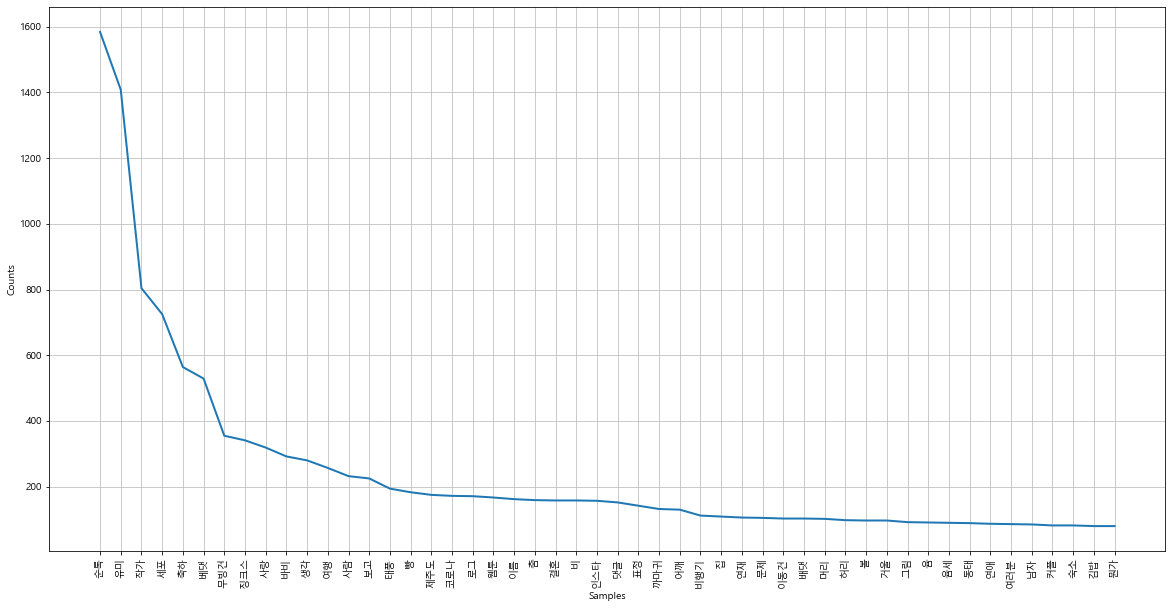

In [17]:
import graphviz
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
plt.rc('font', family = 'NanumGothic')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)


plt.figure(figsize=(20,10))
ko.plot(50)
plt.show()

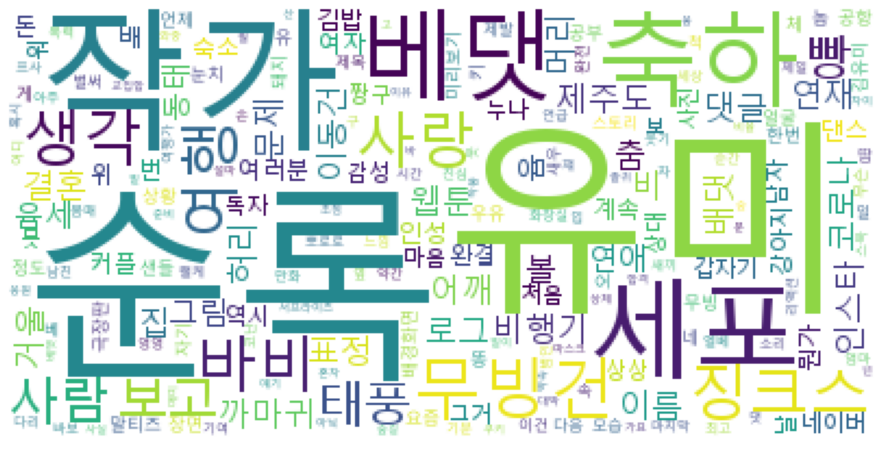

In [19]:
# wordcloud

data = count_num.vocab().most_common()

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()